# Data Preprocessing

## Library Imports

In [2]:
import pandas as pd
from flask import Flask,render_template,request
import re
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tqdm import tqdm #tqdm to track progress
import pickle

## Data Imports

In [3]:
imbd = pd.read_csv("IMDB Dataset.csv")
imbd.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## EDA

In [4]:
imbd.shape

(50000, 2)

In [5]:
imbd.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
imbd.sentiment.value_counts()#counts the values 

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
review_count = imbd[imbd["review"] == "Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed."].value_counts()
print(review_count)

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    sentiment
Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what w

In [8]:
imbd.describe() # The top is the most common value. The freq is the most common value’s frequency

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
imbd[imbd.review == "Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed."]

,review,sentiment
5213,Loved today's show!!! It was a variety and not...,positive
12531,Loved today's show!!! It was a variety and not...,positive
16340,Loved today's show!!! It was a variety and not...,positive
18467,Loved today's show!!! It was a variety and not...,positive
30658,Loved today's show!!! It was a variety and not...,positive


In [10]:
imbd.sentiment.unique()

array(['positive', 'negative'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

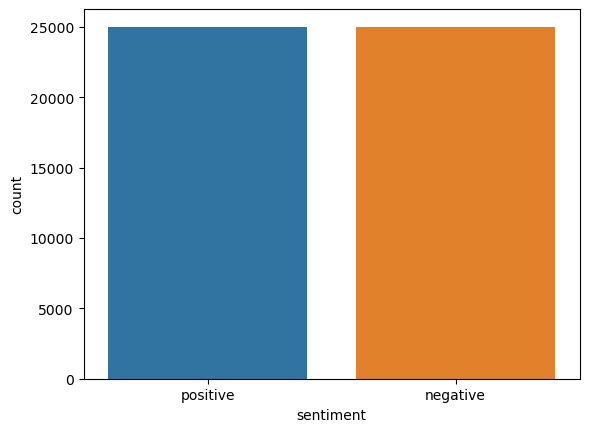

In [11]:
sns.countplot(x = imbd['sentiment'],hue = imbd['sentiment'])

## Handling Missing Values

In [12]:
imbd.isnull().sum()

review       0
sentiment    0
dtype: int64

## Feature Engineering

In [13]:
imbd_copy = imbd.copy()

Technique_1

In [14]:
imbd_copy.replace(to_replace = ["positive" ,"negative" ],value = [0,1])

C:\Users\bavit\AppData\Local\Temp\ipykernel_1544\482627435.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  imbd_copy.replace(to_replace = ["positive" ,"negative" ],value = [0,1])


,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0
...,...,...
49995,I thought this movie did a down right good job...,0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",1
49997,I am a Catholic taught in parochial elementary...,1
49998,I'm going to have to disagree with the previou...,1


Technique_2

In [15]:
label = LabelEncoder()
imbd["sentiment"] = label.fit_transform(imbd["sentiment"])
imbd.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [16]:
X = imbd.review
y = imbd.sentiment
type(X),y.shape

(pandas.core.series.Series, (50000,))

In [17]:
stemmer = PorterStemmer()
lammatizer = WordNetLemmatizer()
corpus = []
X.shape

(50000,)

In [18]:
# nltk.download('stopwords')
for i in tqdm(range(len(X))):
    review = re.sub(r"<.*?>", " ", X[i])
    review = re.sub("[^a-zA-Z]"," ",review)
    review = review.lower()
    review = word_tokenize(review)
    review = [stemmer.stem(word) for word in review if word not in (stopwords.words("english"))]
    review = [lammatizer.lemmatize(word,pos = "v") for word in review ]
    review = " ".join(review)
    corpus.append(review)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [1:20:33<00:00, 10.35it/s]


In [19]:
corpus[2]
len(corpus)

50000

In [20]:
cv = TfidfVectorizer(max_features= 5000) #max_features represents number column can be made from words eg corpus[2] ['think','wonder','way'.....]
X = cv.fit_transform(corpus)

In [21]:
print(X[2])# here 2 represents the row(2) and its column

  (0, 1792)	0.0799234887394666
  (0, 4359)	0.1632048085386877
  (0, 2318)	0.0699741981647926
  (0, 4864)	0.10981134340528495
  (0, 1204)	0.1383740837313934
  (0, 642)	0.10430480385991632
  (0, 2400)	0.16334886345224495
  (0, 1039)	0.1699436249142493
  (0, 4937)	0.08577968851293363
  (0, 4989)	0.07924999610407246
  (0, 4186)	0.11616760928854789
  (0, 300)	0.11340118318212435
  (0, 2436)	0.11686802134631398
  (0, 2206)	0.11023430412273476
  (0, 3958)	0.12508374370000036
  (0, 4541)	0.12085909375964674
  (0, 2709)	0.09634601986607622
  (0, 2227)	0.09686245828159501
  (0, 1121)	0.12367804698261983
  (0, 4981)	0.0639981776498881
  (0, 2532)	0.081228648761337
  (0, 2656)	0.05962680047589893
  (0, 1965)	0.10261418260216573
  (0, 4724)	0.07867555365357218
  (0, 4308)	0.09375668877213487
  :	:
  (0, 904)	0.1378092013203539
  (0, 93)	0.1105980069978443
  (0, 4054)	0.09443451819796742
  (0, 4872)	0.145225924384922
  (0, 4348)	0.1314929687920176
  (0, 2148)	0.11536494768222849
  (0, 4176)	0.096663

In [22]:
X.shape 

(50000, 5000)

## Handling Outliers

# Model Building

## Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2 ,random_state= 42)

In [24]:
print(X_train.shape,"\n",X_train)

(40000, 5000) 
   (0, 3595)	0.11495513851924256
  (0, 2482)	0.09334425024991595
  (0, 1927)	0.10681188003693327
  (0, 4794)	0.09467547163719278
  (0, 906)	0.10192697391288229
  (0, 4270)	0.10108888273042332
  (0, 1401)	0.11926922705093446
  (0, 3408)	0.10099294900449093
  (0, 2759)	0.11495513851924256
  (0, 3579)	0.09576475722184366
  (0, 2891)	0.10756974402424233
  (0, 1598)	0.0936829422901465
  (0, 2183)	0.10990774097028558
  (0, 430)	0.1090408127172274
  (0, 2015)	0.10982707466977325
  (0, 393)	0.0944787873031213
  (0, 3883)	0.08191314767510846
  (0, 2091)	0.08910399443150334
  (0, 29)	0.09746419679920265
  (0, 4715)	0.0934359528543828
  (0, 324)	0.08118270282658144
  (0, 2260)	0.08908026245793602
  (0, 559)	0.09579994940920429
  (0, 2511)	0.10318534390420453
  (0, 4388)	0.09896641428761986
  :	:
  (39999, 2927)	0.06276350349022755
  (39999, 570)	0.10364599910564898
  (39999, 48)	0.07894154594574956
  (39999, 438)	0.0870636886821549
  (39999, 394)	0.16808515982332067
  (39999, 4267)

## Model Initialization

In [25]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

## Model Training

In [26]:
pred = mnb.predict(X_test)
pred

array([1, 1, 0, ..., 0, 0, 0])

## Hyper Parameter Tunning

# Evaluation and Result

In [27]:
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.8529
[[4193  768]
 [ 703 4336]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [28]:
pd.DataFrame(np.c_[Y_test,pred],columns = ["Actual","Predicted"])

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
9995,0,0
9996,1,1
9997,1,0
9998,0,0


In [29]:
# Example for np.c_
np.c_[np.array([1,2,3]), np.array([4,5,6])]
#output:
# array([[1, 4],
#        [2, 5],
#        [3, 6]])
np.c_[np.array([[1,2,3]]), 0,0,np.array([[4,5,6]])]


array([[1, 2, 3, 0, 0, 4, 5, 6]])

<b>Saving my trained naive-bayes model and TFdVectorizer</b>

In [30]:
pickle.dump(cv,open("count-Vectorizer.pkl","wb"))
pickle.dump(mnb,open("Movie_Review_classification.pkl","wb"))

<b>Load my naive-bayes model and TfidVectorizer</b>

In [31]:
save_cv = pickle.load(open('count-Vectorizer.pkl',"rb"))
model = pickle.load(open("Movie_Review_classification.pkl","rb"))

In [32]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return "Positive review"
    else:
        return "Negative review"

In [33]:
sentence1 = "This is a wonderful movie of my life"
res_pos = test_model(sentence1)
print(res_pos)

Positive review


In [34]:
sentence2 = "this movie is bad,worst that i ever seen in my life"
res_neg = test_model(sentence2)
print(res_neg)

Negative review


In [58]:
filename = "Movie_Review_classification.pkl"
classifier = pickle.load(open(filename,"rb"))
cv = pickle.load(open('count-Vectorizer.pkl',"rb"))
app = Flask(__name__)

In [62]:
import pickle
from flask import Flask, request, render_template_string
import nest_asyncio
from werkzeug.serving import run_simple

# To enable running Flask inside Jupyter Notebook
nest_asyncio.apply()

# Load the model and count vectorizer
filename = "Movie_Review_classification.pkl"
classifier = pickle.load(open(filename, "rb"))
cv = pickle.load(open('count-Vectorizer.pkl', "rb"))

app = Flask(__name__)

# Basic home page with enhanced HTML + CSS
@app.route("/")
def home():
    html_content = '''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Movie Review Classification</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background-color: #f4f4f9;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
                margin: 0;
            }
            .container {
                background-color: #fff;
                padding: 20px;
                border-radius: 10px;
                box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
                text-align: center;
            }
            h1 {
                color: #333;
            }
            textarea {
                width: 100%;
                padding: 10px;
                margin-top: 10px;
                border-radius: 5px;
                border: 1px solid #ddd;
            }
            button {
                padding: 10px 20px;
                background-color: #007bff;
                color: #fff;
                border: none;
                border-radius: 5px;
                cursor: pointer;
            }
            button:hover {
                background-color: #0056b3;
            }
            .result {
                font-size: 48px;
                margin-top: 20px;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Movie Review Classification</h1>
            <form action="/predict" method="POST">
                <label for="message">Enter your review:</label><br>
                <textarea id="message" name="message" rows="4" cols="50" placeholder="Type your movie review here..."></textarea><br>
                <button type="submit">Predict</button>
            </form>

            {% if prediction %}
                <div class="result">{{ prediction }}</div>
            {% endif %}
        </div>
    </body>
    </html>
    '''
    return render_template_string(html_content)

# Predict route with emoji output
@app.route('/predict', methods=["POST"])
def predict():
    if request.method == "POST":
        # Get the message (review) from the form
        message = request.form['message']
        
        # Transform the message using the loaded count vectorizer
        data = cv.transform([message]).toarray()
        
        # Make a prediction using the classifier
        prediction = classifier.predict(data)[0]
        
        # Convert the prediction to an emoji
        if prediction == 1:  # Assuming 1 is a positive review
            result = "😊"  # Smiling face for positive review
        else:  # Assuming 0 is a negative review
            result = "😞"  # Sad face for negative review
        
        # Render the result back on the same page
        html_content = '''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Movie Review Classification</title>
            <style>
                body {
                    font-family: Arial, sans-serif;
                    background-color: #f4f4f9;
                    display: flex;
                    justify-content: center;
                    align-items: center;
                    height: 100vh;
                    margin: 0;
                }
                .container {
                    background-color: #fff;
                    padding: 20px;
                    border-radius: 10px;
                    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
                    text-align: center;
                }
                h1 {
                    color: #333;
                }
                textarea {
                    width: 100%;
                    padding: 10px;
                    margin-top: 10px;
                    border-radius: 5px;
                    border: 1px solid #ddd;
                }
                button {
                    padding: 10px 20px;
                    background-color: #007bff;
                    color: #fff;
                    border: none;
                    border-radius: 5px;
                    cursor: pointer;
                }
                button:hover {
                    background-color: #0056b3;
                }
                .result {
                    font-size: 48px;
                    margin-top: 20px;
                }
            </style>
        </head>
        <body>
            <div class="container">
                <h1>Movie Review Classification</h1>
                <form action="/predict" method="POST">
                    <label for="message">Enter your review:</label><br>
                    <textarea id="message" name="message" rows="4" cols="50" placeholder="Type your movie review here..."></textarea><br>
                    <button type="submit">Predict</button>
                </form>

                <div class="result">{{ prediction }}</div>
            </div>
        </body>
        </html>
        '''
        return render_template_string(html_content, prediction=result)

# Run the Flask app within Jupyter Notebook
run_simple('localhost', 5000, app)



 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Oct/2024 15:40:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2024 15:40:37] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2024 15:40:42] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/Oct/2024 15:40:59] "POST /predict HTTP/1.1" 200 -


# Errors

In [54]:
sns.pairplot(imbd,hue = imbd.sentiment)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
sum = 0
for i in nltk.word_tokenize(X):
    review = re.sub("[^a-zA-Z]"," ",X[i])
    review = review.lower()
    review = stemmer.stem(review)
    review = lammatizer.lemmatize(review,pos = "v")
    
    if sum == 1:
        break
    sum += 1
    print()
    print(review)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2 ,random_state= 42)

* mean or full value in heart diseases

catplot from sns,accuracy score,violinplot,contradactory theorem,swarm plot

When we are fitting a model where will be the fitted value are stored

does there is any runtime difference in .lower and .stem to lowerize the words

movie recommandation system project

smote

Predict